# Ref
* 논문: https://www.researchgate.net/publication/313795371_Optimization_of_P_Median_Problem_in_Python_Using_PuLP_Package
* document: https://coin-or.github.io/pulp/technical/pulp.html
* distance matrix: https://minkithub.github.io/2020/10/05/bicgon5/

# Formula
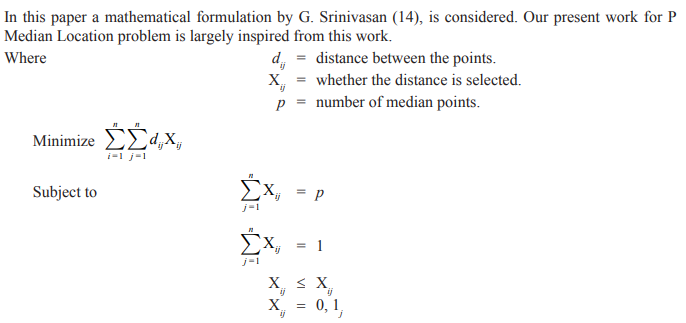
* d: 두 지점 사이의 거리
* X: 해당 지점 선택 유무(0, 1)
* p: 선택할 지점 개수
* 목적함수: d*X 합의 최소화
> 가중치 고려한 수정 필요
* 제약조건: 총 4개, 그림 참고
> 서울시 주거복지센터 입지선정 참고

# Distance Matrix 
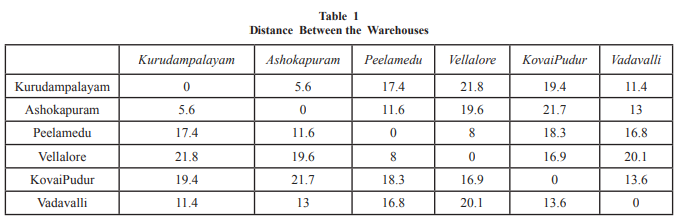
* 우리가 해야될 것: 후보지 간의 거리 행렬 생성
* 후보지: 공원, 공공 체육시설 등 입지 선정 가능한 좌표

In [152]:
# import library
from pulp import *

# variable assignment
location = ['Kurudampalayam','Ashokapuram','Peelamedu','Vellalore','KovaiPudur','Vadavalli']
D = dict(zip(location,[dict(zip(location, [0, 5.6, 17.4, 21.8, 19.4, 11.4])),
    dict(zip(location, [5.6, 0, 11.6, 19.6, 21.7, 13])),
    dict(zip(location, [17.4, 11.6, 0, 8, 18.3, 16.8])),
    dict(zip(location, [21.8, 19.6, 8, 0, 16.9, 20.1])), 
    dict(zip(location, [19.4, 21.7, 18.3, 16.9, 0, 13.6])), 
    dict(zip(location, [11.4, 13, 16.8, 20.1, 13.6, 0]))]))
p = 3

In [153]:
D

{'Kurudampalayam': {'Kurudampalayam': 0,
  'Ashokapuram': 5.6,
  'Peelamedu': 17.4,
  'Vellalore': 21.8,
  'KovaiPudur': 19.4,
  'Vadavalli': 11.4},
 'Ashokapuram': {'Kurudampalayam': 5.6,
  'Ashokapuram': 0,
  'Peelamedu': 11.6,
  'Vellalore': 19.6,
  'KovaiPudur': 21.7,
  'Vadavalli': 13},
 'Peelamedu': {'Kurudampalayam': 17.4,
  'Ashokapuram': 11.6,
  'Peelamedu': 0,
  'Vellalore': 8,
  'KovaiPudur': 18.3,
  'Vadavalli': 16.8},
 'Vellalore': {'Kurudampalayam': 21.8,
  'Ashokapuram': 19.6,
  'Peelamedu': 8,
  'Vellalore': 0,
  'KovaiPudur': 16.9,
  'Vadavalli': 20.1},
 'KovaiPudur': {'Kurudampalayam': 19.4,
  'Ashokapuram': 21.7,
  'Peelamedu': 18.3,
  'Vellalore': 16.9,
  'KovaiPudur': 0,
  'Vadavalli': 13.6},
 'Vadavalli': {'Kurudampalayam': 11.4,
  'Ashokapuram': 13,
  'Peelamedu': 16.8,
  'Vellalore': 20.1,
  'KovaiPudur': 13.6,
  'Vadavalli': 0}}

In [154]:
# decision variables
X = LpVariable.dicts('X_%s_%s', 
                     (location, location), 
                      cat = 'Binary', 
                      lowBound = 0, 
                      upBound = 1)

In [155]:
X

{'Kurudampalayam': {'Kurudampalayam': X_Kurudampalayam_Kurudampalayam,
  'Ashokapuram': X_Kurudampalayam_Ashokapuram,
  'Peelamedu': X_Kurudampalayam_Peelamedu,
  'Vellalore': X_Kurudampalayam_Vellalore,
  'KovaiPudur': X_Kurudampalayam_KovaiPudur,
  'Vadavalli': X_Kurudampalayam_Vadavalli},
 'Ashokapuram': {'Kurudampalayam': X_Ashokapuram_Kurudampalayam,
  'Ashokapuram': X_Ashokapuram_Ashokapuram,
  'Peelamedu': X_Ashokapuram_Peelamedu,
  'Vellalore': X_Ashokapuram_Vellalore,
  'KovaiPudur': X_Ashokapuram_KovaiPudur,
  'Vadavalli': X_Ashokapuram_Vadavalli},
 'Peelamedu': {'Kurudampalayam': X_Peelamedu_Kurudampalayam,
  'Ashokapuram': X_Peelamedu_Ashokapuram,
  'Peelamedu': X_Peelamedu_Peelamedu,
  'Vellalore': X_Peelamedu_Vellalore,
  'KovaiPudur': X_Peelamedu_KovaiPudur,
  'Vadavalli': X_Peelamedu_Vadavalli},
 'Vellalore': {'Kurudampalayam': X_Vellalore_Kurudampalayam,
  'Ashokapuram': X_Vellalore_Ashokapuram,
  'Peelamedu': X_Vellalore_Peelamedu,
  'Vellalore': X_Vellalore_Vellalore

In [156]:
D['Kurudampalayam']

{'Kurudampalayam': 0,
 'Ashokapuram': 5.6,
 'Peelamedu': 17.4,
 'Vellalore': 21.8,
 'KovaiPudur': 19.4,
 'Vadavalli': 11.4}

In [157]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location) for i in location)

# setup constraints 
for i in location:
    prob += sum(X[i][i] for i in location) == p
    for j in location:
        prob += sum(X[i][j] for j in location) == 1
        prob += X[i][j] <= X[j][j]

In [158]:
# save the model to a lp file
prob.writeLP('p-median.lp')

# view the model
print(prob)

# solve the model
prob.solve()
print('Status: ', LpStatus[prob.status])
print('Objective: ', value(prob.objective))

for v in prob.variables():
    #print(v.name, '=', v.varValue)
     if v.varValue == 1:
        print(v.name, '=', v.varValue)

P_Median:
MINIMIZE
21.7*X_Ashokapuram_KovaiPudur + 5.6*X_Ashokapuram_Kurudampalayam + 11.6*X_Ashokapuram_Peelamedu + 13*X_Ashokapuram_Vadavalli + 19.6*X_Ashokapuram_Vellalore + 21.7*X_KovaiPudur_Ashokapuram + 19.4*X_KovaiPudur_Kurudampalayam + 18.3*X_KovaiPudur_Peelamedu + 13.6*X_KovaiPudur_Vadavalli + 16.9*X_KovaiPudur_Vellalore + 5.6*X_Kurudampalayam_Ashokapuram + 19.4*X_Kurudampalayam_KovaiPudur + 17.4*X_Kurudampalayam_Peelamedu + 11.4*X_Kurudampalayam_Vadavalli + 21.8*X_Kurudampalayam_Vellalore + 11.6*X_Peelamedu_Ashokapuram + 18.3*X_Peelamedu_KovaiPudur + 17.4*X_Peelamedu_Kurudampalayam + 16.8*X_Peelamedu_Vadavalli + 8*X_Peelamedu_Vellalore + 13*X_Vadavalli_Ashokapuram + 13.6*X_Vadavalli_KovaiPudur + 11.4*X_Vadavalli_Kurudampalayam + 16.8*X_Vadavalli_Peelamedu + 20.1*X_Vadavalli_Vellalore + 19.6*X_Vellalore_Ashokapuram + 16.9*X_Vellalore_KovaiPudur + 21.8*X_Vellalore_Kurudampalayam + 8*X_Vellalore_Peelamedu + 20.1*X_Vellalore_Vadavalli + 0.0
SUBJECT TO
_C1: X_Ashokapuram_Ashokapur

# Retry

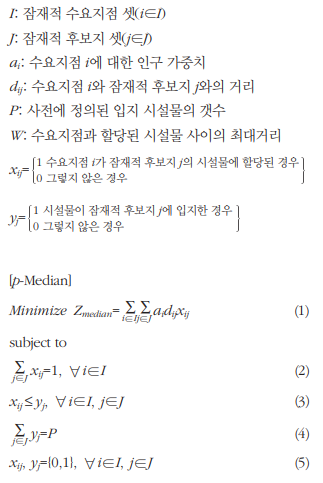

In [1]:
import numpy as np
import pandas as pd

입지후보지_원래 = pd.read_csv('입지선정후보군_좌표추가.csv', encoding='EUC-KR')
입지후보지 = 입지후보지_원래[입지후보지_원래['행정동'] == '석관동']
후보지_points = np.array([list(i) for i in zip(입지후보지['x좌표'], 입지후보지['y좌표'])])

In [2]:
버스 = pd.read_csv('서울시_버스정류장_행정동추가.csv')
버스 = 버스[버스['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                 '월계3동','월계1동','장위1동','장위2동','장위3동'])]
버스_points = np.array([list(i) for i in zip(버스['X좌표'], 버스['Y좌표'])])

지하철 = pd.read_csv('서울시_지하철역_행정동추가.csv', encoding='EUC-KR', index_col=0)
지하철 = 지하철[지하철['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                       '월계3동','월계1동','장위1동','장위2동','장위3동'])]
지하철_points = np.array([list(i) for i in zip(지하철['경도'], 지하철['위도'])])

주차장 = pd.read_csv('서울시_주차장_행정동추가.csv', encoding='EUC-KR', index_col=0).drop('Unnamed: 0.1', axis=1)
주차장 = 주차장[주차장['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                       '월계3동','월계1동','장위1동','장위2동','장위3동'])]
주차장_points = np.array([list(i) for i in zip(주차장['경도'], 주차장['위도'])])

주택 = pd.read_csv('서울시주택_행정동추가.csv', encoding='EUC-KR', index_col=0).drop('Unnamed: 0.1', axis=1)
주택 = 주택[주택['행정동'].isin(['석관동','월곡2동','회기동','이문1동','이문2동','묵2동','공릉1동',\
                                 '월계3동','월계1동','장위1동','장위2동','장위3동'])]
주택_points = np.array([list(i) for i in zip(주택['위도'], 주택['경도'])])   # 위도 경도 바뀜

X = list(버스['X좌표']) + list(지하철['경도']) + list(주차장['경도']) + list(주택['위도'])
Y = list(버스['Y좌표']) + list(지하철['위도']) + list(주차장['위도']) + list(주택['경도'])
points = np.array([list(i) for i in zip(X, Y)])

In [3]:
from haversine import haversine

havers = []
for i in 후보지_points:
    site = []
    for j in 버스_points:
        site.append(haversine(i,j))
    havers.append(site)
#havers[0]

In [4]:
from pulp import *

# 후보지와 버스정류장 간 거리행렬 생성
location = list(입지후보지['시설명'])
location2 = list(버스['정류소명'])

havers_D = dict(zip(location, [dict(zip(location2, i)) for i in havers]))
D = havers_D

In [5]:
X = LpVariable.dicts('X_%s_%s', 
                    (location, location2), 
                     cat = 'Binary', 
                     lowBound = 0, 
                     upBound = 1)

# 수정수정수정 - 시작
* W_i: 가중치 행렬
* X_ij: 수요지점 i가 후보지에 할당된 경우 ~ 1
* Y_j: 시설물이 후보지에 입지한 경우 ~ P

### 가중치 행렬

In [7]:
전체w = points.shape[0]
버스w = 버스.shape[0]
지하철w = 지하철.shape[0]
주차장w = 주차장.shape[0]
주택w = 주택.shape[0]

In [8]:
m1 = (전체w-버스w)/전체w
m2 = (전체w-지하철w)/전체w
m3 = (전체w-주차장w)/전체w
m4 = (전체w-주택w)/전체w

### 후보지 행렬

In [27]:
Y = 입지후보지['시설명']

In [ ]:
for j in location
Y[j]

In [23]:
location

['돌   뫼',
 '샛   별',
 '성북종합레포츠타운수영장',
 '성북종합레포츠타운체육관',
 '석계역 굴다리',
 '샛별',
 '돌뫼',
 '화랑',
 '청량']

In [1]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)
#prob += sum(sum(w[i][j] * D[i][j] * X[i][j] for j in location2) for i in location)

# setup constraints 
for i in location:
    prob += sum(X[i][j] for j in location2) == p
for i in location:
    prob += sum(Y[i]) == p

In [ ]:
prob = LpProblem("FacilityLocation", LpMinimize)
use_vars = LpVariable.dicts("UseLocation", LOCATIONS, 0, 1, LpBinary)
waste_vars = LpVariable.dicts("Waste", LOCATIONS, 0, CAPACITY)
assign_vars = LpVariable.dicts("AtLocation",
                [(i, j) for i in LOCATIONS
                        for j in PRODUCTS],
                0, 1, LpBinary)
prob += lpSum(waste_vars[i] for i in LOCATIONS)
for j in PRODUCTS:
prob += lpSum(assign_vars[(i, j)] for i in LOCATIONS) == 1
for i in LOCATIONS:
prob += lpSum(assign_vars[(i, j)] * REQUIRE[j] for j in PRODUCTS)
prob.solve()
TOL = 0.00001
for i in LOCATIONS:
    if use_vars[i].varValue > TOL:
        print("Location ", i, " produces ", \
             [j for j in PRODUCTS
             if assign_vars[(i, j)].varValue > TOL])

In [ ]:
# setup constraints 
for i in location:
    prob += sum(X[i][j] for j in location2) == p
    for j in location:
        prob += sum(X[i][j] for j in location) == 1
        prob += X[i][j] <= X[j][j]

# 수정수정수정 - 끝

In [38]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

# # setup constraints (원래) --> 초기 에러

# for i in location: 
#     prob += sum(X[i][i] for i in location) == p
#     for j in location:
#         prob += sum(X[i][j] for j in location) == 1
#         prob += X[i][j] <= X[j][j]

In [34]:
# # create the LP object, set up as a MINIMIZATION problem
# prob = LpProblem('P_Median', LpMinimize)
# prob += sum(sum(D[i][j] * X[i][j] for j in location) for i in location)

# # setup constraints (ii, jj 삭제) --> 결과값 나오지만 다 0.0
# for j in location2:
#     prob += sum(X[i][j] for j in location2) == 1

In [55]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

# setup constraints --> 결과 나오긴 함 (해석 불가) # i in location

p = 3

for i in location:
    prob += sum(X[i][j] for i in location) == p
    for j in location2:
        prob += sum(X[i][j] for j in location2) == 1
        prob += X[i][j] <= X[i][j]

In [22]:
# # setup constraints --> 결과 나오긴 함 (해석 불가) # j in location2

# p = 3
# for i in location:
#     prob += sum(X[i][j] for j in location2) == p
#     for j in location2:
#         prob += sum(X[i][j] for i in location) == 1
#         prob += X[i][j] <= X[i][j]

In [50]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

# setup constraints --> 결과 나오긴 함 (해석 불가) # i in location

p = 3

for i in location:
    prob += sum(X[i][j] for j in location2) == p
    prob += sum(X[i][j] for j in location2) == 1
    for j in location2:
        prob += X[i][j] <= X[i][j]

In [17]:
# # setup constraints --> objective: none

# p = 3
# prob += (sum(X[i][j] for j in location2) for i in location) == p
# prob += (sum(X[i][j] for i in location) for j in location2) == 1

# for i in location:
#     for j in location2:
#         prob += X[i][j] <= X[i][j]

C:\Users\USER\Anaconda3\lib\site-packages\pulp\pulp.py:1544: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [120]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

# setup constraints --> 

p = 3

for i in location: # 후보지에 대해서
    # X의 합은 3이 되어야 함 
    prob += (sum(X[i][j] for j in location2) for j in location) == p
    for j in location2:
        prob += sum(X[i][j] for j in location2) == 1
        prob += X[i][j] <= X[i][j]

In [62]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

# setup constraints 
p = 3
prob += (sum(X[i][j] for j in location2) for i in location) == p
for i in location: 
     for j in location2:
        prob += sum(X[i][j] for j in location2) == 1
        prob += X[i][j] <= X[i][j]

In [66]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

# setup constraints 
p = 3
#prob += (sum(X[i][j] for i in location) for j in location2) == p
prob += sum(X[i][j] for i in location) == p
for i in location: 
     for j in location2:
        prob += sum(X[i][j] for j in location2) == 1
        prob += X[i][j] <= X[i][j]

In [ ]:
# 3개는 나오는데 문제 있음
# prob = LpProblem('P_Median', LpMinimize)
# prob += sum(sum(havers_D[i][j] * X[i][j] for j in location2) for i in location)

# p = 3
# prob += sum(X[i][j] for i in location) == p
# prob += sum(X[i][j] for j in location2) == 1
# prob += X[i][j] <= X[i][j]
# prob

In [79]:
# # None
# prob = LpProblem('P_Median', LpMinimize)
# prob += sum(sum(havers_D[i][j] * X[i][j] for j in location2) for i in location)

# p = 5

# prob += (sum(X[i][j] for i in location) for j in location2) == p
# prob += (sum(X[i][j] for j in location2) for j in location2) == 1
# for i in location:
#     for j in location2:
#         prob += X[i][j] <= X[i][j]
# prob

In [160]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)
p = 3

# setup constraints 
for i in location:
    prob += sum(X[i][j] for i in location) == p
    for j in location2:
        prob += sum(X[i][j] for j in location2) == 1
        prob += X[i][j] <= X[i][j]

In [162]:
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location2) for i in location)

p = 3

# 여기서 p는 후보지 개수가 아니라 버스정류장 개수로 나옴 
for i in location: 
    prob += sum(X[i][j] for j in location2) == p
# prob += sum(X[i][j] for j in location2) == p
for i in location:
    for j in location2:
        prob += sum(X[i][j] for j in location2) == 1
        prob += X[i][j] <= X[i][j]

In [163]:
# save the model to a lp file
prob.writeLP('p-median.lp')

# # view the model
# print(prob)

# solve the model
prob.solve()
print('Status: ', LpStatus[prob.status])
print('Objective: ', value(prob.objective))

for v in prob.variables():
    #print(v.name, '=', v.varValue )
    if v.varValue == 1:
        print(v.name, '=', v.varValue)

Status:  Infeasible
Objective:  7.796079863312181
X_돌___뫼_돌곶이역 = 1.0
X_돌___뫼_새석관시장 = 1.0
X_돌___뫼_월곡중학교 = 1.0
X_돌뫼_돌곶이역 = 1.0
X_돌뫼_새석관시장 = 1.0
X_돌뫼_월곡중학교 = 1.0
X_샛___별_석계역1번출구 = 1.0
X_샛___별_석계역1번출구.B = 1.0
X_샛___별_석계역문화공원 = 1.0
X_샛별_석계역1번출구 = 1.0
X_샛별_석계역1번출구.B = 1.0
X_샛별_석계역문화공원 = 1.0
X_석계역_굴다리_석계역1번출구 = 1.0
X_석계역_굴다리_석계역1번출구.B = 1.0
X_석계역_굴다리_석계역문화공원 = 1.0
X_성북종합레포츠타운수영장_석계역 = 1.0
X_성북종합레포츠타운수영장_석계역2번출구 = 1.0
X_성북종합레포츠타운수영장_석관고등학교후문 = 1.0
X_성북종합레포츠타운체육관_석계역 = 1.0
X_성북종합레포츠타운체육관_석계역2번출구 = 1.0
X_성북종합레포츠타운체육관_석관고등학교후문 = 1.0
X_청량_돌곶이역 = 1.0
X_청량_돌곶이역8번출구 = 1.0
X_청량_석관시장 = 1.0
X_화랑_돌곶이역 = 1.0
X_화랑_돌곶이역8번출구 = 1.0
X_화랑_새석관시장 = 1.0


In [ ]:
127.06414	37.614111
127.064186	37.614016
127.063579	37.614357


In [ ]:
from pulp import *

# REQUIRE = {
# 1 : 7,
# 2 : 5,
# 3 : 3,
# 4 : 2,
# 5 : 2
# }

REQUIRE = {
  '석계역': 0.45409689952272353,
  '한진한화그랑빌아파트': 0.5461396514899887,
  '석계역2번출구': 0.4777756778291803,
  '쌍용아파트': 0.6096382376697788,
  '석계역1번출구.A': 0.6361938029809834,
  '태릉입구역': 0.6831938764570461,
  '월계보건지소': 1.7319031920201349,
  '돌곶이역': 1.52754684327985,

}

# PRODUCTS = [1,2,3,4,5]
# LOCATIONS = location
PRODUCTS = list(버스['정류소명']) # REQUIRE
LOCATIONS = location # 후보지
CAPACITY = 3

prob = LpProblem("FacilityLocation", LpMinimize)
use_vars = LpVariable.dicts("UseLocation", LOCATIONS, 0, 1, LpBinary)
waste_vars = LpVariable.dicts("Waste", LOCATIONS, 0, CAPACITY)
assign_vars = LpVariable.dicts("AtLocation",
                [(i, j) for i in LOCATIONS
                        for j in PRODUCTS],
                0, 1, LpBinary)

In [141]:
prob += lpSum(waste_vars[i] for i in LOCATIONS)

for j in PRODUCTS:
    prob += lpSum(assign_vars[(i, j)] for i in LOCATIONS) == 1
    
for i in LOCATIONS:
    prob += lpSum(assign_vars[(i, j)] * REQUIRE[j] for j in PRODUCTS) \
                   + waste_vars[i] == CAPACITY * use_vars[i]

prob.solve()

TOL = 0.00001
for i in LOCATIONS:
    if use_vars[i].varValue > TOL:
        print("Location ", i, " produces ", \
             [j for j in PRODUCTS
             if assign_vars[(i, j)].varValue > TOL])

Location  돌   뫼  produces  ['태릉사거리', '이문동쌍용아파트', '이문동현대아파트앞', '녹천초등학교월계이마트']
Location  샛   별  produces  ['한천초등학교', '장위시장', '꿈의숲SK뷰아파트']
Location  성북종합레포츠타운수영장  produces  ['석관동코오롱아파트', '월계사슴아파트3단지', '금보당금은방']
Location  성북종합레포츠타운체육관  produces  ['석계역2번출구', '월계삼거리', '국민은행사거리']
Location  석계역 굴다리  produces  ['쌍용아파트', '공릉시장', '월계현대아파트', '신이문역']
Location  샛별  produces  ['석계역1번출구.B', '월계사슴아파트3단지', '꿈의숲SK뷰아파트', '석계역문화공원']
Location  돌뫼  produces  ['석계역', '석계역굴다리앞', '공릉신도2차아파트', '노원문화원']
Location  화랑  produces  ['장위1동주민센터', '대동아파트', '공릉1동삼익아파트']
Location  청량  produces  ['한진한화그랑빌아파트', '석계역1번출구.A', '태릉입구역', '월계보건지소', '돌곶이역', '경희중고', '석관동주민센터', '장위래미안아파트', '신도브래뉴.한전노원변전소', '꿈의숲아이파크아파트', '장곡초교사거리', '먹골역', '한국전력동부지사', '장위3동주민센터', '월계미륭아파트', '월계미성아파트', '외대앞', '회기시장', '인덕삼거리', '장위1동치안센터', '장위1동주민센터', '서울과학기술대입구', '광운대역', '월계삼호4차아파트', '월계삼호아파트', '월계동진아교통', '석관시장', '석관동새마을금고', '한국예술종합학교', '의릉입구', '국민은행장위동지점', '월계현대아파트', '물류센터', '장곡초교', '장위동고개', '월곡중학교', '공릉역', '장위119안전센터', '인덕대앞', '월계삼거리', '광운대학교', '벼루말교',